# Udacity Project #4: Testing a Perceptual Phenomenon

In this notebook, I run some statistical tests on data generated as part of an experiment about the [Stroop Effect](https://en.wikipedia.org/wiki/Stroop_effect). In addition, I answer questions posed as part of the Udacity Data Analyst Nanodegree project that these data come from. First, let's reproduce the background information provided as part of the project, to establish context.

## Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example <span style="color:red">RED</span>, <span style="color:blue">BLUE</span>. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example <span style="color:brown">PURPLE</span>, <span style="color:green">ORANGE</span>. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

## Questions for Investigation

1. What is our independent variable? What is our dependent variable?
2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

Now it’s your chance to try out the Stroop task for yourself. Go to [this link](https://faculty.washington.edu/chudler/java/ready.html), which has a Java-based applet for performing the Stroop task. Record the times that you received on the task (you do not need to submit your times to the site.) Now, download [this dataset](https://drive.google.com/file/d/0B9Yf01UaIbUgQXpYb2NhZ29yX1U/view?usp%3Dsharing&sa=D&ust=1528668949102000) which contains results from a number of participants in the task. Each row of the dataset contains the performance for one participant, with the first number their results on the congruent task and the second number their performance on the incongruent task.

3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.
4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.
5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?
6. **Optional:** What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

### Question 1: What is our independent variable? What is our dependent variable?

For this experiment, we're comparing the outcomes of two different conditions:

1. **Condition A:** congruent words. This is the condition in which the words themselves match the color of the font of the words. 
2. **Condition B:** incongruent words. In this condition, the words *do not* match the font color of the words.

**Thus, the independent variable here is the condition being applied (A or B, congruent or incongruent, resp.).**

**The dependent, or outcome, variable here is the time it takes for a participant to correctly name the font color being used for a word, regardless of the word itself.** Each condition provides the same number of words, so response times are controlled for list size.

### Question 2: What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform?

Here are the hypotheses I propose:

* **Null hypothesis:** $H_0: \mu_{time_A} - \mu_{time_B} = 0$, where $\mu_{time_A}$ is the average response time for participants in Condition A, and $\mu_{time_B}$ is the average response time for participants in Condition B.
    * In other words, it is expected that the average response time for the population, when exposed to Condition A, will be equivalent to the average response time for the population exposed to Condition B. This means that we expect it will be equally fast for a participant to respond to congruent and incongruent color representations.
    
* **Alternative hypothesis:** $H_A: \mu_{time_A} - \mu_{time_B} \neq 0$
    * In English terms, we expect that the average population response time for Condition A will differ in some way from those for Condition B. Intuitively, it seems likely that Condition B will elicit a longer average time than Condition A, meaning that we could use a directional hypothesis (e.g. $\mu_{time_A} - \mu_{time_B} \leq 0$). However, a more conservative approach that will require a larger effect size to see it (and that ensures we don't lose information in the scenario wherein Condition A's average response time is actually *larger* than Condition B's) is to require simply a lack of equivalency between the two Conditions' outcomes, which is what we're doing with this hypothesis.


Given that the response times we'll be using in this analysis are paired (each participant is exposed to Condition A and B, with their response time for each recorded), and given the nature of our hypotheses, **we'll be using a two-tailed paired t-test for this analysis. We'll assume significance at the 95% confidence level (and thus $p < 0.05$)**, a pretty common assumption for statisticians.

### OK, time for some data!

In this section, I'll pull in the data provided as part of the project as a pandas DataFrame. Since I don't know all of the conditions imposed when the data were collected, in an effort to control for confounding variables I'm going to leave my own data out of the set being analyzed. However, for the sake of fun, here are my own results:

Response Time for Condition A (Congruent, in seconds) | Response Time for Condition B (Incongruent, in seconds)
--- | ---
24.878 | 26.343

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('stroopdata.csv')
data

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


In [8]:
data_summary = data.describe()
data_summary

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [13]:
r_A = data_summary.loc['max', 'Congruent'] - data_summary.loc['min', 'Congruent']
r_B = data_summary.loc['max', 'Incongruent'] - data_summary.loc['min', 'Incongruent']

iqr_A = data_summary.loc['75%', 'Congruent'] - data_summary.loc['25%', 'Congruent']
iqr_B = data_summary.loc['75%', 'Incongruent'] - data_summary.loc['25%', 'Incongruent']

print(f'Range_A = {r_A};\nRange_B = {r_B}')
print(f'\nIQR_A = {iqr_A};\nIQR_B = {iqr_B}')

Range_A = 13.698000000000002;
Range_B = 19.568

IQR_A = 4.3054999999999986;
IQR_B = 5.33475


### Question 3: Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

I figured, given how powerful pandas's summarization capabilities are, why limit myself to just one each of measures of central tendency and variability - why not do most of them? Here are the results of the descriptive statistics as seen above:

#### Measures of Central Tendency

Measure | Condition A (Congruent) | Condition B (Incongruent)
--- | ---
**Mean** | 14.05 sec | 22.02 sec
**Median** | 14.36 sec | 21.02 sec

#### Measures of Variability

Measure | Condition A (Congruent) | Condition B (Incongruent)
--- | ---
**Range** | 13.70 sec | 19.57 sec
**Interquartile Range** | 4.31 sec | 5.33 sec
**Standard Deviation (StDev)** | 3.56 sec | 4.80 sec

### Question 4: Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

First things first, if we're going to plot these data easily, we'll need the DataFrame to be in a long format.

In [24]:
data_long = data.melt(id_vars = None, value_vars = ['Congruent', 'Incongruent'],
                     var_name = 'Condition', value_name = 'Response Time (s)')
data_long

,Condition,Response Time (s)
0,Congruent,12.079
1,Congruent,16.791
2,Congruent,9.564
3,Congruent,8.630
4,Congruent,14.669
5,Congruent,12.238
6,Congruent,14.692
7,Congruent,8.987
8,Congruent,9.401
9,Congruent,14.480


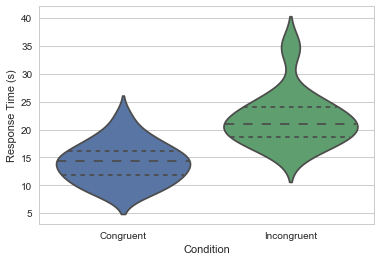

In [29]:
import seaborn as sns

sns.set(style="whitegrid")
sns.violinplot(x = 'Condition', y = 'Response Time (s)', data=data_long, inner = 'quartile',
              scale = 'count')

These violin plots are helpful as they provide us with a variety of information in a relatively dense format. We can see the median values and interquartile ranges of the data for both the Congruent and Incongruent conditions (Conditions A and B, resp.) via the dashed horizontal lines. Additionally, we can see the distribution of the data at different response time levels via the shape of each plot (both of which are scaled to be reflective of their respective counts to provide an accurate categorical comparison). As we can see here, the medians and interquartile ranges are significantly different, being higher for Incongruent than Congruent responses, whetting our palettes for the upcoming statistical testing and suggesting a significant difference between the two conditions.

In [35]:
from scipy import stats

#This will provide the t* value for our given degrees of freedom
t_critical = stats.t.ppf(q = 0.025, df = 46)

print(f"t* = {t_critical}")

t* = -2.012895595294589


### Question 5: Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

As I mentioned earlier, we'll be using a confidence level of 95% and a two-tailed paired t-test for this analysis. As such, and given the fact that we have $n = 48$ and thus $df = 46$, we calculate $t_{critical} = t* = \pm 2.013$ (see preceding code). So let's get to it!

As a reminder, our relevant equations are the following:


$df_{PairedSamples}=df_{paired}=(n_A−1)+(n_B−1)=n_A+n_B−2$

$StDev_{paired}=\sigma_{paired}=\sqrt{\sigma_A^2+\sigma_B^2}$

$StandardError_{paired}=SE_{paired}=\sqrt{\frac{\sigma_A^2}{n_A}+\frac{\sigma_B^2}{n_B}}$

$t=\frac{(\bar{x}_A-\bar{x}_B)-0}{SE_{paired}}=\frac{\bar{x}_A-\bar{x}_B}{SE_{paired}}$

**Cohen's d**, used for measuring effect sizes:
$d=\frac{\bar{x}_A-\bar{x}_B}{StDev_{paired}}$

**NOTE:** I'm not using the pooled variance equation here because that corrects for differing sample sizes between groups, something that isn't a concern for a paired response experiment like this one. 

In [47]:
import math

mean_A = data_summary.loc['mean', 'Congruent']
std_A =  data_summary.loc['std', 'Congruent']

mean_B = data_summary.loc['mean', 'Incongruent']
std_B = data_summary.loc['std', 'Incongruent']

stDev_paired = math.sqrt((std_A)**2 + (std_B)**2)

stdErr_paired = math.sqrt((std_A**2+std_B**2)/24)

t = (mean_A - mean_B)/stdErr_paired

d = (mean_A - mean_B)/stDev_paired

print(f"t-statistic = {t}")
print(f"t* = {t_critical}")
print(f"Effect size, d = {d}")

t-statistic = -6.532250553903228
t* = -2.012895595294589
Effect size, d = -1.3333900607563076


Well, there you have it! According to these t-test results, **there is a statistically significant difference between the Congruent responses and the Incongruent responses at the 95% confidence level.** 

**As such, we reject the null hypothesis.** What's more, since we chose to subtract the mean of the Incongruent responses from those of the Congruent responses, we can say that the sign of our t-statistic indicates that the Congruent responses were faster than the Incongruent ones, aligning well with what we described as the intuition for how the relationship between the two groups would work out.

### Question 6: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? 

Based upon my own speculation, as well as a quick literature review, it looks like these results can be explained by a heuristic-like aspect of our brains (e.g. we like to think in shortcuts, such as reading the color's name instead of processing the visual stimuli of the actual colors) and the effort it takes to overcome heuristics. This description in my words aligns well with the concepts of ["selective attention" and "automaticity."](https://en.wikipedia.org/wiki/Stroop_effect#Selective_attention)

Interestingly, my brief reading didn't turn up much for alternative experiments to test the concepts behind the Stroop Effect (although I have little doubt that more time would have turned up plenty of examples). My immediate thought of an alternative experiment is to test someone's ability to identify shapes using a shape name paired with a visual representation of the shape. 

Additionally, there are joke structures that can be utilized as another experimental form (e.g. ask lots of questions wherein "milk" is the correct answer, then ask "what do cows drink?"). This is somewhat more an example of priming the human mind, but arguably the Stroop experiment does something similar by providing the Congruent test before the Incongruent one (an ideal experimental design would randomize which participants receive first).